In [6]:
from unsuper import *
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

/opt/conda/lib/python2.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/opt/conda/lib/python2.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

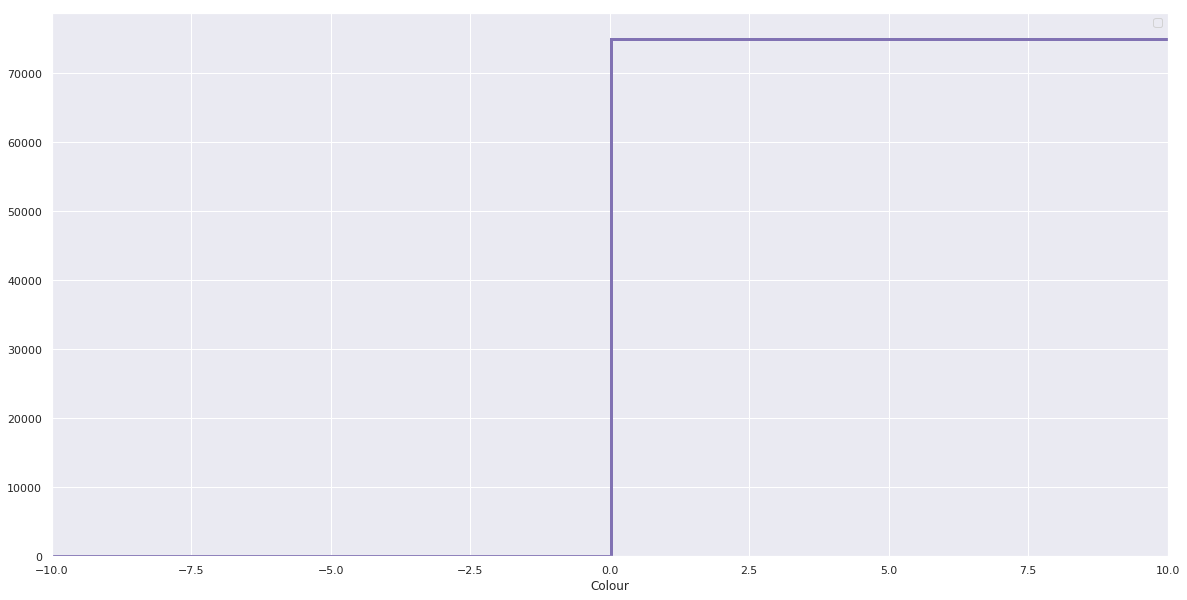

In [12]:
data = load_data(monte=False)
#X=data
#print(X.shape)
inputs_col = pd.DataFrame()

data['u-g']=data['u']-data['g']
data['g-r']=data['g']-data['r']
data['r-i']=data['r']-data['i']
data['i-z']=data['i']-data['z']
data['z-y']=data['z']-data['y']
data['u-G']=data['u']-data['G']
data['u-RP']=data['u']-data['RP']
data['u-BP']=data['u']-data['BP']

#X = data[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP']].copy()
#X = normalize(X_input)
X2 = data[['u', 'g', 'r', 'i', 'z', 'u','BP', 'RP', 'G','Teff', 'logg', 'feh']].copy()
X = data[['u','g','r','i', 'z', 'BP', 'RP', 'G']].copy() #, 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP']].copy()

fig, ax = plt.subplots(figsize=(20, 10))
for column in X.head():
    ax = sns.distplot(X[column], kde=False,hist=True, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1})
    ax.set_xlim(-10, 10)
    ax.set_xlabel('Colour')
    ax.legend()
plt.show()

X2_norm = normalize(X2)
X_norm = normalize(X)

X_copy = X_norm.copy()

for column in X_norm.columns.values:
    print X_copy.shape, column
    condition = (X_norm[str(column)]<2.5)&(X_norm[str(column)]>-2.5)
    X_copy = X_copy[condition]
    X2 = X2[condition]

for column in X_copy.head():
    ax = sns.distplot(X_copy[column], kde=False,hist=True, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1})
    ax.set_xlim(-10, 10)
    ax.set_xlabel('Colour')
    ax.legend()
plt.show()
print X_norm.shape
X_norm = X_copy.copy()
X2 = X2.copy()

In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_norm)  

array([2, 4, 4, ..., 0, 1, 4])

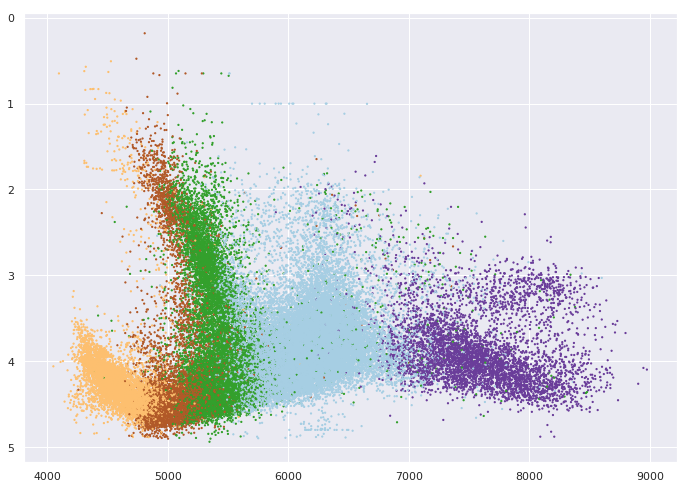

In [9]:
X_clust = X2.copy()
X_clust['labels'] = cluster.labels_
plt.scatter(X_clust['Teff'], X_clust['logg'], c=X_clust['labels'], s=1.5, cmap=plt.cm.Paired)
plt.gca().invert_yaxis()

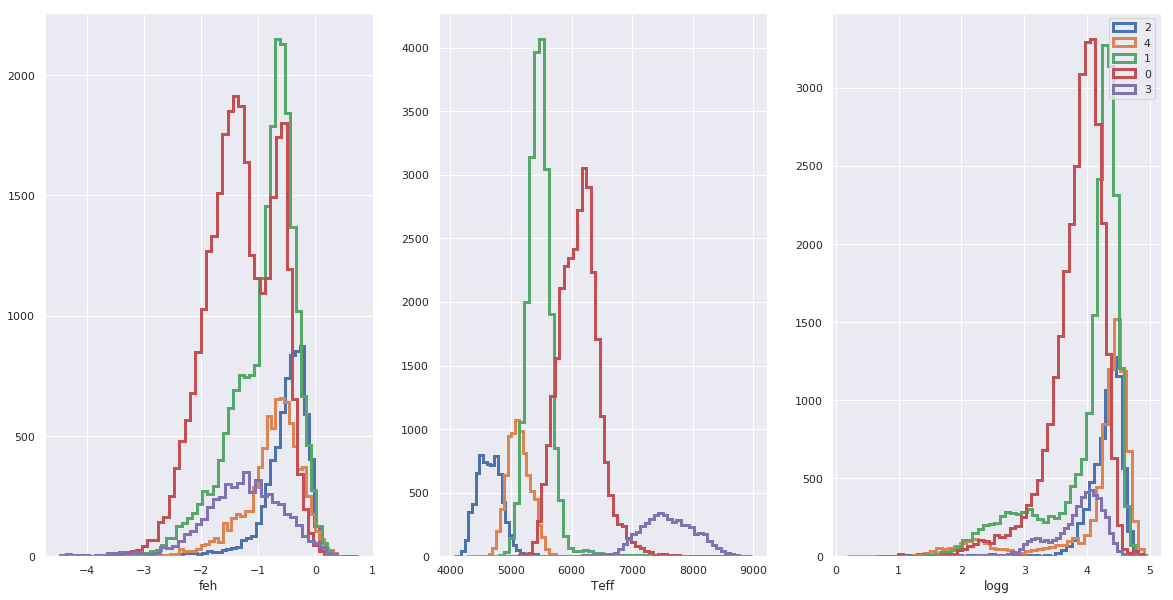

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))#, #sharey=True)
X_labelled = X_clust.copy()
max_cluster = X_labelled['labels'].unique()
for i in max_cluster:
    X_clust_label = X_labelled.loc[X_labelled['labels'] == i]
    sns.distplot(X_clust_label['feh'], kde=False,hist=True, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1}, ax=ax1, label=str(i))
    plt.legend()
    sns.distplot(X_clust_label['Teff'],kde=False, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1},ax=ax2, label=str(i))
    plt.legend()
    sns.distplot(X_clust_label['logg'],kde=False, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1}, ax=ax3, label=str(i))
    plt.legend()

In [6]:
data = load_data_glob('../../data/CFIS_PSf_Gaia_NGC6341.fits').dropna()
data

KeyError: 'SNR'

In [ ]:
#X=data
#print(X.shape)
inputs_col_glob = pd.DataFrame()

inputs_col_glob['u-g']=data['u']-data['g']
inputs_col_glob['g-r']=data['g']-data['r']
inputs_col_glob['r-i']=data['r']-data['i']
inputs_col_glob['i-z']=data['i']-data['z']
inputs_col_glob['z-y']=data['z']-data['y']
inputs_col_glob['u-G']=data['u']-data['G']
inputs_col_glob['u-RP']=data['u']-data['RP']
inputs_col_glob['u-BP']=data['u']-data['BP']

#X = data[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP']].copy()
#X = normalize(X_input)
X_glob = inputs_col_glob[['u-g','r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP']].copy().dropna()
X_glob_norm = normalize(X_glob)
data['labels'] = cluster.fit_predict(X_glob_norm)

In [ ]:
data['labels']

In [ ]:
for column in X_glob_norm.columns.values:
    print X_glob_norm.shape, column
    condition = (X_glob_norm[str(column)]<0.5)&(X_glob_norm[str(column)]>-0.5)
    data = data[condition]
    
##############################
## NGC 6341 ##
##############################
plt.scatter(data['u']-data['G'], data['G'], s=0.7, c = data['labels'])
plt.gca().invert_yaxis()